In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import latexify
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [31]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [32]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [33]:
print(f"Train set: \n {train.isnull().sum()}, {train.shape} \n Test Set: \n {test.isnull().sum()}, {test.shape}")

Train set: 
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64, (8693, 14) 
 Test Set: 
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64, (4277, 13)


In [34]:
train.dropna(inplace=True)

In [35]:
train["Cabin"] = train["Cabin"].str.split("/")
train["Deck"] = train["Cabin"].str[0]
train["Deck_Num"] = train["Cabin"].str[1]
train["Side"] = train["Cabin"].str[2]

test["Cabin"] = test["Cabin"].str.split("/")
test["Deck"] = test["Cabin"].str[0]
test["Deck_Num"] = test["Cabin"].str[1]
test["Side"] = test["Cabin"].str[2]

<h2> Exploratory data analysis </h2>

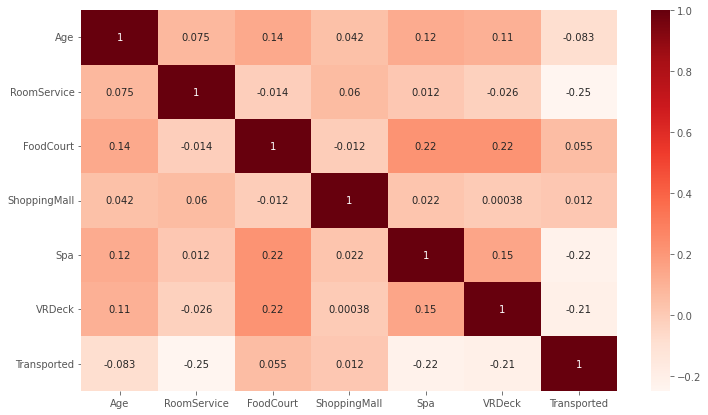

In [36]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(),annot=True, cmap='Reds')
plt.show()

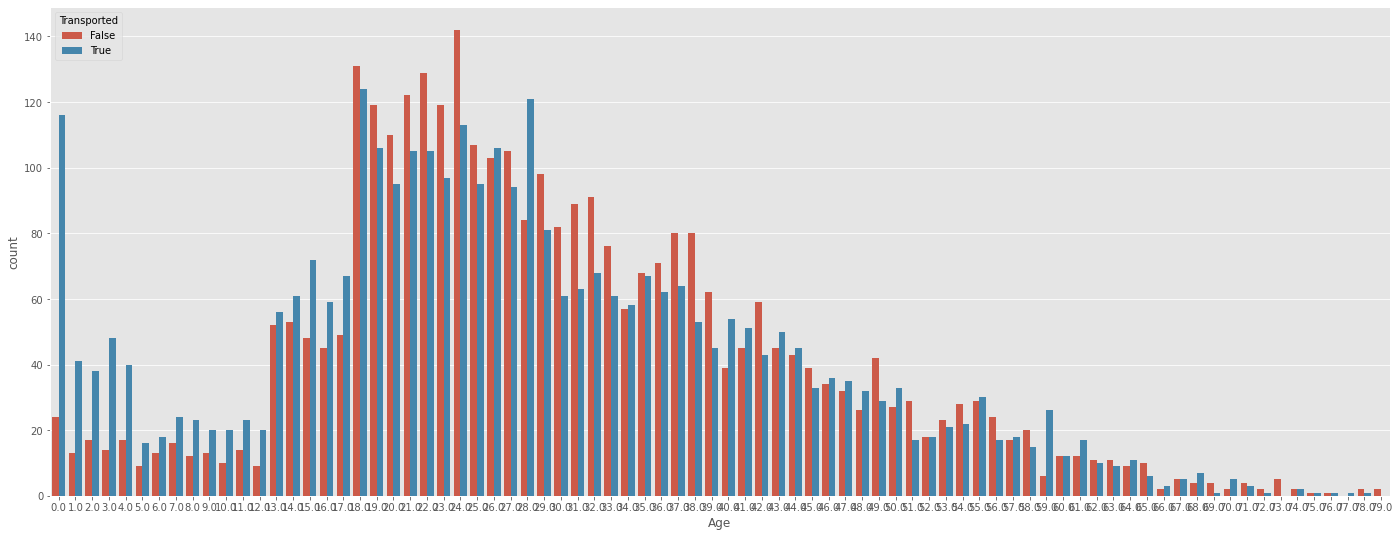

In [37]:
plt.figure(figsize=(24,9))
sns.countplot(data = train, x = 'Age', hue = 'Transported')
plt.show()

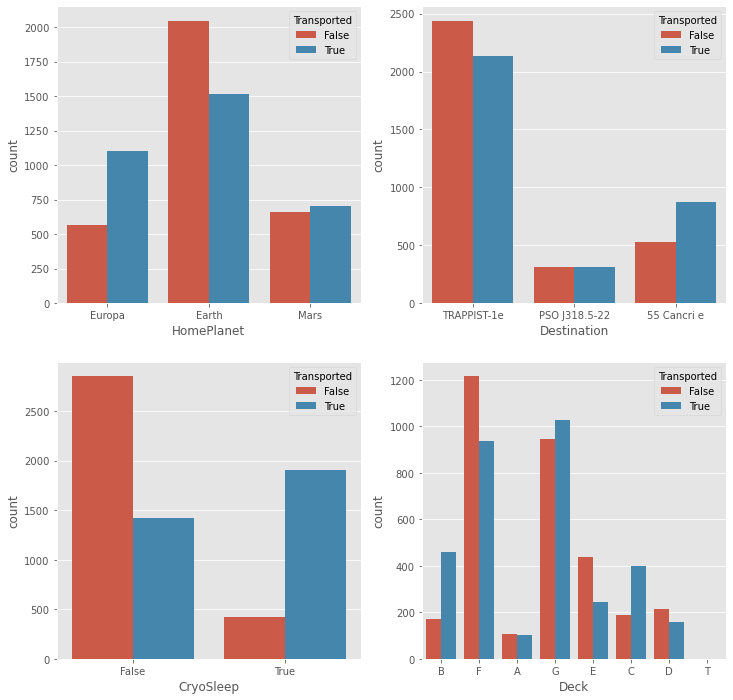

In [38]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

sns.countplot(ax = ax[0, 0], data = train, x = "HomePlanet", hue = "Transported")
sns.countplot(ax = ax[0, 1], data = train, x = "Destination", hue = "Transported")
sns.countplot(ax = ax[1, 0], data = train, x = "CryoSleep", hue = "Transported")
sns.countplot(ax = ax[1, 1], data=train, x='Deck', hue='Transported')

plt.show()

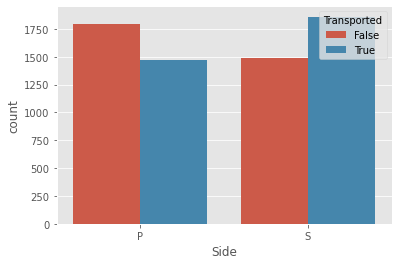

In [39]:
sns.countplot(data = train, x = "Side", hue="Transported")
plt.show()

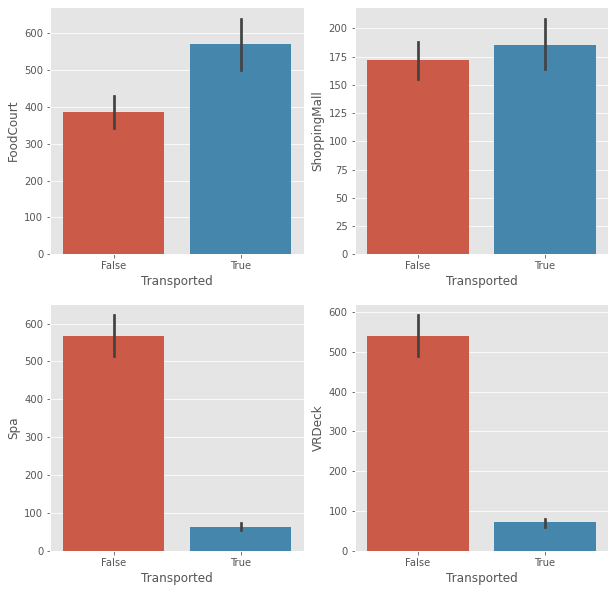

In [40]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))

sns.barplot(ax=ax[0,0], data=train, x='Transported', y='FoodCourt')
sns.barplot(ax=ax[0,1], data=train, x='Transported', y='ShoppingMall')
sns.barplot(ax=ax[1,0], data=train, x='Transported', y='Spa')
sns.barplot(ax=ax[1,1], data=train, x='Transported', y='VRDeck')

plt.show()

<h2> Data Preparation </h2>

In [41]:
train["PassengerId"] = train["PassengerId"].str.split("_")
train["PassengerId"]

train["Group"] = train["PassengerId"].str[0]

test["PassengerId"] = test["PassengerId"].str.split("_")
test["PassengerId"]

test["Group"] = test["PassengerId"].str[0]

In [42]:
train["Deck"].value_counts()

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: Deck, dtype: int64

In [43]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Deck_Num,Side,Group
0,"[0001, 01]",Europa,False,"[B, 0, P]",TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001
1,"[0002, 01]",Earth,False,"[F, 0, S]",TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002
2,"[0003, 01]",Europa,False,"[A, 0, S]",TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003
3,"[0003, 02]",Europa,False,"[A, 0, S]",TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003
4,"[0004, 01]",Earth,False,"[F, 1, S]",TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004


In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def automatize_one_hot_enc(dataset, column_name, prefix_to_append):
    le = LabelEncoder()
    enc = OneHotEncoder()
    dataset[f"{column_name}"] = le.fit_transform(dataset[f"{column_name}"])
    dummies = pd.get_dummies(dataset[f"{column_name}"], prefix=prefix_to_append)
    return dummies

train = train.join(automatize_one_hot_enc(train, "Deck", "Deck"), how="left")
train = train.join(automatize_one_hot_enc(train, "Destination", "dest"))
train = train.join(automatize_one_hot_enc(train, "HomePlanet", "h_m"))
train = train.join(automatize_one_hot_enc(train, "Side", "Side_board"))

test = test.join(automatize_one_hot_enc(test, "Deck", 'Deck'))
test = test.join(automatize_one_hot_enc(test, "Destination", "dest"))
test = test.join(automatize_one_hot_enc(test, "HomePlanet", "h_m"))
test = test.join(automatize_one_hot_enc(test, "Side", "Side_board"))

In [45]:
train = train.drop(["Cabin", "Destination", "HomePlanet", "Deck", "Name"], axis=1)
test = test.drop(["Cabin", "Destination", "HomePlanet", "Deck", "Name"], axis=1)
train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_6,Deck_7,dest_0,dest_1,dest_2,h_m_0,h_m_1,h_m_2,Side_board_0,Side_board_1
0,"[0001, 01]",False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,0,1,0,1,0,1,0
1,"[0002, 01]",False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,0,0,1,1,0,0,0,1
2,"[0003, 01]",False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,0,0,0,1,0,1,0,0,1
3,"[0003, 02]",False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,0,0,0,1,0,1,0,0,1
4,"[0004, 01]",False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,0,0,1,1,0,0,0,1


In [46]:
from sklearn.model_selection import train_test_split

x_testing = train.drop(["Transported", "PassengerId"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_testing, train["Transported"], random_state=334441, test_size=0.20)

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

classifiers = [
    KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    KNeighborsClassifier(10),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    GradientBoostingClassifier()
]

y_predictions = []
def test_classifiers(classifier):
    print("\nTestando agora... ", classifier)
    clf = classifier
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_predictions.append(y_pred)
    return f"Accuracy de {classifier} foi de {accuracy_score(y_test, y_pred)}"

for classifier in classifiers:
    print(test_classifiers(classifier))


Testando agora...  KNeighborsClassifier(n_neighbors=3)
Accuracy de KNeighborsClassifier(n_neighbors=3) foi de 0.7556732223903178

Testando agora...  KNeighborsClassifier()
Accuracy de KNeighborsClassifier() foi de 0.7571860816944024

Testando agora...  KNeighborsClassifier(n_neighbors=10)
Accuracy de KNeighborsClassifier(n_neighbors=10) foi de 0.7526475037821483

Testando agora...  DecisionTreeClassifier()
Accuracy de DecisionTreeClassifier() foi de 0.7428139183055976

Testando agora...  RandomForestClassifier()
Accuracy de RandomForestClassifier() foi de 0.8048411497730711

Testando agora...  MLPClassifier(alpha=1, max_iter=1000)
Accuracy de MLPClassifier(alpha=1, max_iter=1000) foi de 0.6830559757942511

Testando agora...  AdaBoostClassifier()
Accuracy de AdaBoostClassifier() foi de 0.7889561270801816

Testando agora...  GaussianNB()
Accuracy de GaussianNB() foi de 0.7239031770045385

Testando agora...  GradientBoostingClassifier()
Accuracy de GradientBoostingClassifier() foi de 0.8

<h2>Submission

In [48]:
train.fillna(inplace=True, method='bfill')
print(train.shape)

(6606, 29)


In [49]:
x_final_test = train.drop(["PassengerId", "Transported"], axis=1)
full_xtrain = pd.concat([x_train, x_test], axis=0)
full_xtrain

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_Num,Side,...,Deck_6,Deck_7,dest_0,dest_1,dest_2,h_m_0,h_m_1,h_m_2,Side_board_0,Side_board_1
2686,False,36.0,False,418.0,40.0,7.0,338.0,0.0,592,0,...,0,0,0,0,1,1,0,0,1,0
7995,False,18.0,False,0.0,1878.0,0.0,18572.0,10028.0,280,0,...,0,0,0,0,1,0,1,0,1,0
8618,False,31.0,False,1.0,104.0,1338.0,698.0,126.0,339,1,...,0,0,0,0,1,0,1,0,0,1
1841,True,38.0,False,0.0,0.0,0.0,0.0,0.0,319,0,...,1,0,0,1,0,1,0,0,1,0
7392,True,17.0,False,0.0,0.0,0.0,0.0,0.0,1276,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,False,40.0,False,1309.0,0.0,0.0,0.0,0.0,1591,1,...,0,0,0,0,1,0,0,1,0,1
6397,False,53.0,False,1964.0,0.0,635.0,0.0,0.0,1292,1,...,0,0,0,0,1,0,0,1,0,1
5240,False,17.0,False,0.0,823.0,0.0,1168.0,14.0,1163,0,...,0,0,0,0,1,1,0,0,1,0
1978,True,27.0,False,0.0,0.0,0.0,0.0,0.0,72,1,...,0,0,0,0,1,0,1,0,0,1


In [50]:
full_ytrain = pd.concat([y_train, y_test], axis=0)
full_ytrain

2686    False
7995    False
8618     True
1841     True
7392     True
        ...  
7770    False
6397    False
5240    False
1978     True
4825     True
Name: Transported, Length: 6606, dtype: bool

In [51]:
clf = GradientBoostingClassifier()
model = clf.fit(full_xtrain, full_ytrain)
y_pred = model.predict(x_final_test)

In [52]:
d = {"PassengerId": train["PassengerId"], "Transported":y_pred}
export = pd.DataFrame(data=d)

In [53]:
export

,PassengerId,Transported
0,"[0001, 01]",True
1,"[0002, 01]",False
2,"[0003, 01]",False
3,"[0003, 02]",False
4,"[0004, 01]",True
...,...,...
8688,"[9276, 01]",False
8689,"[9278, 01]",True
8690,"[9279, 01]",True
8691,"[9280, 01]",False


In [54]:
export["Transported"].value_counts()

True     3553
False    3053
Name: Transported, dtype: int64

In [55]:
export.to_csv("./data/submission.csv", columns=["PassengerId", "Transported"], index=False)